# NUMPY

In [235]:
import numpy as np

In [236]:
a1 = np.array([[1,2,3],[4,5,6]])
print('shape :',a1.shape)
print('dimention :',a1.ndim)
print('type :',a1.dtype)
print('size :',a1.size)
print(a1)

shape : (2, 3)
dimention : 2
type : int32
size : 6
[[1 2 3]
 [4 5 6]]


In [237]:
full = np.full((4,3), 0, dtype=np.int8)
full

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [238]:
np.random.seed(3) # just seed for reproducibility random
rand = np.random.randint(0,10, (3,4))
rand

array([[8, 9, 3, 8],
       [8, 0, 5, 3],
       [9, 9, 5, 7]])

In [239]:
rand = np.random.uniform(0,5, (3,2)) #float
rand

array([[0.46775749, 3.47411826],
       [0.72685072, 2.26586151],
       [1.07788504, 1.76952536]])

In [240]:
space = np.linspace(0,3,10)
space

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

### Viewing

In [241]:
metrix = np.arange(1,10).reshape(3,3)
metrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [242]:
print(metrix[0,:]) # rows, columns
print(metrix[:,0])

[1 2 3]
[1 4 7]


In [243]:
a2 = np.random.randint(0,10, (2,3,2,4))
a2

array([[[[2, 2, 1, 3],
         [5, 8, 1, 8]],

        [[7, 8, 1, 0],
         [5, 4, 1, 5]],

        [[4, 7, 6, 0],
         [0, 9, 2, 4]]],


       [[[5, 8, 8, 7],
         [5, 1, 1, 1]],

        [[5, 5, 7, 4],
         [3, 0, 0, 0]],

        [[0, 2, 2, 7],
         [0, 5, 0, 1]]]])

In [244]:
a2[0,:,1,2:]

array([[1, 8],
       [1, 5],
       [2, 4]])

### Arithmetic

In [245]:
a1

array([[1, 2, 3],
       [4, 5, 6]])

In [246]:
a1 / 2

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In [247]:
a2 = np.arange(2,8).reshape(2,3)
a2

array([[2, 3, 4],
       [5, 6, 7]])

In [248]:
a1 + a2

array([[ 3,  5,  7],
       [ 9, 11, 13]])

### Aggregation

In [249]:
a1

array([[1, 2, 3],
       [4, 5, 6]])

In [250]:
np.sum(a1) # mean, max, std

21

In [251]:
print(np.cumsum(a1))# cumulative sum : like fibonacci
print(np.cumsum(a1, axis=1))

[ 1  3  6 10 15 21]
[[ 1  3  6]
 [ 4  9 15]]


In [252]:
np.argmax(a1) # return max value index

5

In [253]:
np.argmax([False,True,False,True,True]) # return 1st index is True

1

In [254]:
np.argmin([True,True,False,True,True]) # return 1st index is False

2

In [255]:
# variance and standard deviation 
# var = std**2
np.var(a1) == np.square(np.std(a1))

True

### Transposting

In [256]:
a1

array([[1, 2, 3],
       [4, 5, 6]])

In [257]:
a1.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [258]:
print(a1.reshape(-1,1)) # -1 mean number that don't know
print(a1.reshape(1,-1))
print(a1.reshape(-1,))

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1 2 3 4 5 6]]
[1 2 3 4 5 6]


### Dot product vs Element wise

In [259]:
m1 = np.random.randint(10, size=(2,3))
m2 = np.random.randint(10, size=(2,3))

print(m1)
print(m2)

[[4 1 2]
 [2 4 8]]
[[0 6 0]
 [4 1 5]]


In [260]:
m1 * m2 # element wise

array([[ 0,  6,  0],
       [ 8,  4, 40]])

In [261]:
np.dot(m1,m2.T) # dot product

array([[ 6, 27],
       [24, 52]])

### Dot product example

In [262]:
np.random.seed(0)
sale_amount = np.random.randint(20, size=(5,3))
sale_amount

array([[12, 15,  0],
       [ 3,  3,  7],
       [ 9, 19, 18],
       [ 4,  6, 12],
       [ 1,  6,  7]])

In [263]:
import pandas as pd
weekly_sales = pd.DataFrame(sale_amount, 
                            index=['Mon','Tuse','wed','Thurs','Fri'], 
                            columns=['Almond','Peanut','Cashew'])
weekly_sales

,Almond,Peanut,Cashew
Mon,12,15,0
Tuse,3,3,7
wed,9,19,18
Thurs,4,6,12
Fri,1,6,7


In [264]:
price = np.array([10,8,12]).reshape(1,3)
butter_price = pd.DataFrame(price, index=['Price'],  
                            columns=['Almond','Peanut','Cashew'])
butter_price

,Almond,Peanut,Cashew
Price,10,8,12


In [265]:
weekly_sales.shape, butter_price.shape

((5, 3), (1, 3))

> we want column Total($) shape like (5,1) or (1,5) 

In [229]:
weekly_sales.dot(price.T) # or price.dot(weekly_sales.T) 

,0
Mon,240
Tuse,138
wed,458
Thurs,232
Fri,142


In [266]:
weekly_sales['Total($)'] = weekly_sales.dot(price.T)
weekly_sales

,Almond,Peanut,Cashew,Total($)
Mon,12,15,0,240
Tuse,3,3,7,138
wed,9,19,18,458
Thurs,4,6,12,232
Fri,1,6,7,142


> that's 

### Sorting

In [284]:
np.random.seed(1)
m3 = np.random.randint(20, size=(4,3))
m3

array([[ 5, 11, 12],
       [ 8,  9, 11],
       [ 5, 15,  0],
       [16,  1, 12]])

In [285]:
np.sort(m3, axis=1) # axis = 1 sort in rows

array([[ 5, 11, 12],
       [ 8,  9, 11],
       [ 0,  5, 15],
       [ 1, 12, 16]])

In [286]:
m3

array([[ 5, 11, 12],
       [ 8,  9, 11],
       [ 5, 15,  0],
       [16,  1, 12]])

In [289]:
np.argsort(m3, axis=1) # order index of sorting

array([[0, 1, 2],
       [0, 1, 2],
       [2, 0, 1],
       [1, 2, 0]], dtype=int64)

> in row index 2 = [2,0,1] mean on original m3 index 2 first, 0 second, and 1 ; 5,15,0 ==> 0,5,15

### Practical Example

<img src="data\Panda-Smile.jpg" width="400"/>

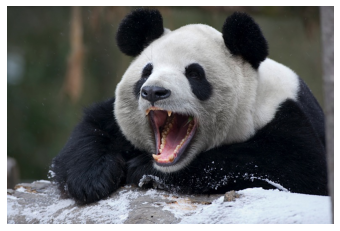

In [293]:
import matplotlib.pyplot as plt

panda = plt.imread('data\Panda-Smile.jpg')
plt.imshow(panda)
plt.axis('off');

In [294]:
panda.shape, panda.ndim

((520, 780, 3), 3)

[[41 41 41 42 42 42 43 43 42 42 42 42 42 42 43 43 45 45 45 45]
 [42 42 42 42 43 43 43 43 43 43 44 44 44 44 44 44 46 46 46 46]
 [43 43 44 44 44 44 44 45 45 45 45 46 46 46 45 45 47 47 47 47]
 [45 45 45 45 46 46 46 46 45 46 46 47 47 46 46 46 48 48 48 48]
 [47 47 47 47 47 47 47 47 47 47 47 48 48 47 47 46 47 47 47 47]
 [48 48 48 48 48 48 48 48 48 49 49 49 49 48 48 48 47 47 47 47]
 [49 49 49 49 49 49 49 49 50 50 50 50 49 49 49 49 48 48 48 48]
 [50 50 50 50 49 49 49 49 50 50 50 50 49 49 49 49 49 49 49 49]
 [49 50 50 50 49 49 49 49 51 50 50 49 49 49 49 49 49 48 48 49]
 [49 49 49 49 49 49 49 49 50 50 50 49 49 49 49 49 51 50 49 49]]


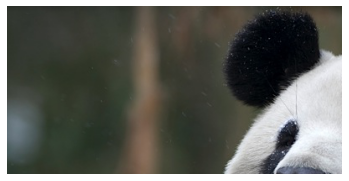

In [338]:
print(panda[:10,:20,0])
plt.imshow(panda[:200,:400,:])
plt.axis('off');